## Extracting specific attack intervals

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the new attacks and their intervals
attacks_json = {
    "max_engine_coolant_temp_attack_masquerade": {
        "description": "start from drive/idle; drive; accelerate; decelerate; accelerate; start injecting; engine temp too hot light comes on, stop injecting",
        "elapsed_sec": 25.875548,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0x4e7",
        "injection_interval": [19.979078, 24.170183],
        "modified": True,
        "on_dyno": True
    },
    "max_speedometer_attack_1_masquerade": {
        "description": "start from park; drive; accelerate; start injecting; speedometer jumps to maximum, stop injecting; decelerate; park",
        "elapsed_sec": 88.021577,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0xd0",
        "injection_interval": [42.009204, 66.449011],
        "modified": True,
        "on_dyno": True
    },
    "max_speedometer_attack_2_masquerade": {
        "description": "start from driving; accelerate; start injecting; speedometer jumps to maximum, decelerate, stop injecting; accelerate; decelerate; park",
        "elapsed_sec": 59.696973,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0xd0",
        "injection_interval": [16.009225, 47.408246],
        "modified": True,
        "on_dyno": True
    },
    "max_speedometer_attack_3_masquerade": {
        "description": "start from driving; start injecting; speedometer jumps to maximum, accelerate; decelerate; coast; stop injecting; decelerate; park",
        "elapsed_sec": 86.766667,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0xd0",
        "injection_interval": [9.516489, 70.587285],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_off_attack_1_masquerade": {
        "description": "start from park; reverse; reverse lights turn on; accelerate; coast; start injecting; reverse lights turn off, stop injecting; reverse lights turn on",
        "elapsed_sec": 28.109869,
        "injection_data_str": "XXXX04XXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [16.627923, 23.347311],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_off_attack_2_masquerade": {
        "description": "start from park; reverse; reverse lights turn on; accelerate; coast; start injecting; reverse lights turn off, stop injecting; reverse lights turn on",
        "elapsed_sec": 40.665296,
        "injection_data_str": "XXXX04XXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [13.168608, 36.87663],
        "modified": True,
        "on_dyno": True
    },
        "reverse_light_off_attack_3_masquerade": {
        "description": "start from park; reverse; reverse lights turn on; accelerate; coast; start injecting; reverse lights turn off, stop injecting; reverse lights turn on; decelerate; park; reverse lights turn off",
        "elapsed_sec": 57.884882,
        "injection_data_str": "XXXX04XXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [16.524085, 40.862015],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_on_attack_1_masquerade": {
        "description": "start from park; drive (reverse lights turn on fleetingly when shifting through R); accelerate; start injecting; reverse lights turn on, coast; stop injecting; reverse lights turn off; decelerate; park (reverse lights turn on fleetingly when shifting through R)",
        "elapsed_sec": 54.850207,
        "injection_data_str": "XXXX0CXXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [18.929177, 38.836015],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_on_attack_2_masquerade": {
        "description": "start from park; drive (reverse lights turn on fleetingly when shifting through R); accelerate; start injecting; reverse lights turn on, accelerate/decelerate/coast; stop injecting; reverse lights turn off; decelerate; park (reverse lights turn on fleetingly when shifting through R)",
        "elapsed_sec": 72.020905,
        "injection_data_str": "XXXX0CXXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [20.407134, 57.297253],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_on_attack_3_masquerade": {
        "description": "start from park; drive (reverse lights turn on fleetingly when shifting through R); accelerate; start injecting; reverse lights turn on, coast; stop injecting; reverse lights turn off; decelerate; park (reverse lights turn on fleetingly when shifting through R)",
        "elapsed_sec": 64.258771,
        "injection_data_str": "XXXX0CXXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [23.070278, 46.580686],
        "modified": True,
        "on_dyno": True
    }

}

# Print details for each attack
for attack_name, attack_info in attacks_json.items():
    print(f"Attack: {attack_name}")
    print(f"  Description: {attack_info['description']}")
    print(f"  Elapsed Time: {attack_info['elapsed_sec']} seconds")
    print(f"  Injection Interval: {attack_info['injection_interval']}")
    print("----------------------------------------------------\n")



Attack: max_engine_coolant_temp_attack_masquerade
  Description: start from drive/idle; drive; accelerate; decelerate; accelerate; start injecting; engine temp too hot light comes on, stop injecting
  Elapsed Time: 25.875548 seconds
  Injection Interval: [19.979078, 24.170183]
----------------------------------------------------

Attack: max_speedometer_attack_1_masquerade
  Description: start from park; drive; accelerate; start injecting; speedometer jumps to maximum, stop injecting; decelerate; park
  Elapsed Time: 88.021577 seconds
  Injection Interval: [42.009204, 66.449011]
----------------------------------------------------

Attack: max_speedometer_attack_2_masquerade
  Description: start from driving; accelerate; start injecting; speedometer jumps to maximum, decelerate, stop injecting; accelerate; decelerate; park
  Elapsed Time: 59.696973 seconds
  Injection Interval: [16.009225, 47.408246]
----------------------------------------------------

Attack: max_speedometer_attack_3

In [6]:
# Define combinations of window sizes and offsets as provided
combinations = [
    (2, 1),
    (3, 1), (3, 2),
    (4, 1), (4, 2), (4, 3),
    (5, 1), (5, 2), (5, 3),(5, 4),
    (6, 1), (6, 2), (6, 3),(6, 4),(6, 5),
    (10, 1), (10, 2), (10, 3),(10, 4),(10, 5),(10, 6), (10, 7), (10, 8),(10, 9),
    (15, 1), (15, 2), (15, 3),(15, 4),(15, 5),(15, 6), (15, 7), (15, 8),(15, 9),(15, 10),(15, 11), (15, 12), (15, 13),(15, 14),
  
    # Add more combinations as needed
]

Example:

Imagine an attack between seconds 5 and 7. Let's consider two scenarios:

 Window Size = 3 ,Offset = 2: Windows will be generated: [0, 3], [2, 5], [4, 7], [6, 9]. 

The [4, 7] window would be marked "red".

 Window Size = 3,Offset = 1: Windows will be generated: [0, 3], [1, 4], [2, 5], [3, 6]... 
 
Several windows in this case would register "red".

In [7]:
####The check_overlap function receives the calculated window_start and window_end for each window iteration.  
### Essentially, the calculate_and_display_proportions function uses the offset to determine where 
## each window is positioned in time, and then check_overlap decides if that specific window has an overlap.

####The offset parameter is crucial in the calculate_and_display_proportions function.
##Determining Total Windows: total_windows = int(np.ceil(attack_duration / offset))
##Iterating Windows: The for window_index in range(total_windows): loop steps through windows.
##Calculating Window Boundaries:
##window_start = window_index * offset
##window_end = window_start + window_size

##The check_overlap here in our case is concerned with the specifics of 1 window.
## The offset controls the positioning and generation of these windows across the full capture, 
## ensuring that the analysis checks different segments of time.


def check_overlap(window_start, window_end, attack_intervals):
    """Checks if a given window overlaps with any of the attack intervals."""
    for attack_start, attack_end in attack_intervals:
        if window_start <= attack_end and window_end >= attack_start:  # Any overlap
            return "red"  # Mark the window as red
    return "not-red"





def calculate_and_display_proportions(attacks_json, combinations):
    """Calculate proportions, print results, and store for visualization."""
    all_results = {}
    for attack_name, attack_details in attacks_json.items():
        print(f"\n{attack_name} (Duration: {attack_details['elapsed_sec']} seconds):")
        results = []
        attack_duration = attack_details["elapsed_sec"]
        attack_intervals = [attack_details["injection_interval"]]

        for window_size, offset in combinations:
            total_windows = int(np.ceil(attack_duration / offset))
            total_red_windows = 0

            for window_index in range(total_windows):
                window_start = window_index * offset
                window_end = window_start + window_size
                if window_end > attack_duration:
                    break

                window_status = check_overlap(window_start, window_end, attack_intervals)
                if window_status == "red":
                    total_red_windows += 1

            proportion_red = total_red_windows / total_windows

            results.append({'Window Size': window_size, 'Offset': offset, 'Proportion of Red Windows': proportion_red})
            print(f"Window Size: {window_size}, Offset: {offset}, Proportion of Red Windows: {proportion_red:.4f}")

        all_results[attack_name] = results
    return all_results

def calculate_overlay_fraction(window_start, window_end, attack_intervals):
    """Calculates overlap as a fraction of a second if only a partial overlap occurs."""
    for attack_start, attack_end in attack_intervals:
        overlay_start = max(window_start, attack_start)
        overlay_end = min(window_end, attack_end)
        if overlay_start <= overlay_end:
            overlay_duration = overlay_end - overlay_start
            return overlay_duration / 1.0
    return 0
all_results = calculate_and_display_proportions(attacks_json, combinations)




max_engine_coolant_temp_attack_masquerade (Duration: 25.875548 seconds):
Window Size: 2, Offset: 1, Proportion of Red Windows: 0.2308
Window Size: 3, Offset: 1, Proportion of Red Windows: 0.2308
Window Size: 3, Offset: 2, Proportion of Red Windows: 0.2308
Window Size: 4, Offset: 1, Proportion of Red Windows: 0.2308
Window Size: 4, Offset: 2, Proportion of Red Windows: 0.2308
Window Size: 4, Offset: 3, Proportion of Red Windows: 0.2222
Window Size: 5, Offset: 1, Proportion of Red Windows: 0.2308
Window Size: 5, Offset: 2, Proportion of Red Windows: 0.2308
Window Size: 5, Offset: 3, Proportion of Red Windows: 0.2222
Window Size: 5, Offset: 4, Proportion of Red Windows: 0.2857
Window Size: 6, Offset: 1, Proportion of Red Windows: 0.2308
Window Size: 6, Offset: 2, Proportion of Red Windows: 0.2308
Window Size: 6, Offset: 3, Proportion of Red Windows: 0.2222
Window Size: 6, Offset: 4, Proportion of Red Windows: 0.1429
Window Size: 6, Offset: 5, Proportion of Red Windows: 0.1667
Window Size

In [8]:
def create_heatmap_for_attack(attack_name, all_results):
    if attack_name not in all_results:
        print(f"No data for attack: {attack_name}")
        return
    
    results = all_results[attack_name]
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(results)

    # Ensure offsets are in ascending order
    df.sort_values(by=['Offset', 'Window Size'], ascending=[True, True], inplace=True)

    # Pivot the DataFrame to create a 2D matrix for the heatmap with swapped axes
    heatmap_data = df.pivot(index='Offset', columns='Window Size', values='Proportion of Red Windows')

    # Plotting with a red to blue color map
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(heatmap_data, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
    plt.title(f'Proportion of Red Windows for {attack_name}')
    plt.xlabel('Window Size')
    plt.ylabel('Offset')

    # Invert y-axis to display offsets from 1 to 6
    ax.invert_yaxis()

    # Display the plot
    plt.show()


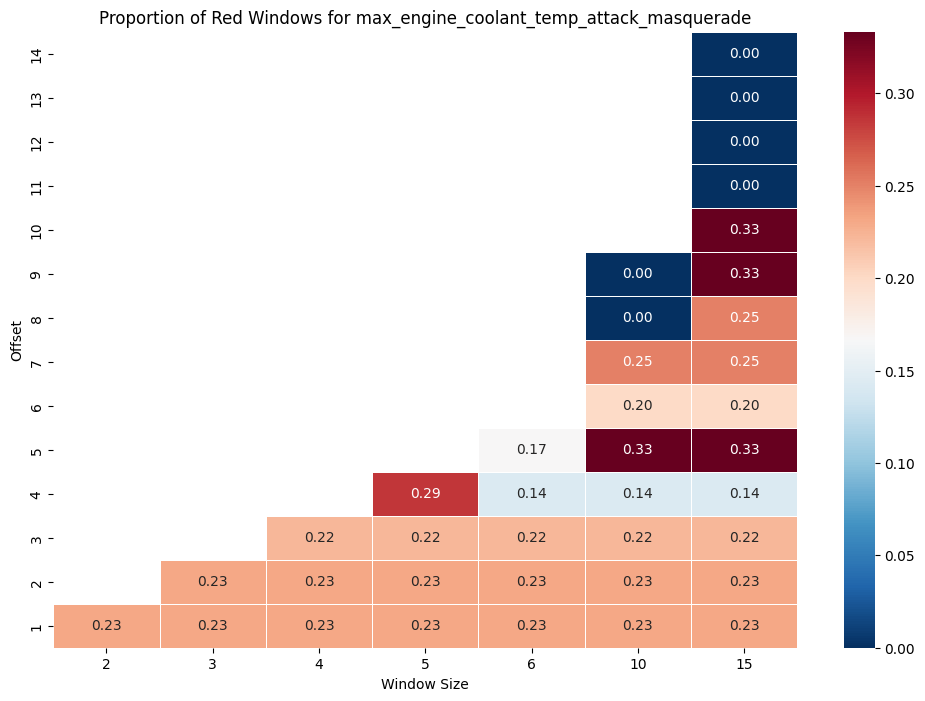

In [10]:
create_heatmap_for_attack('max_engine_coolant_temp_attack_masquerade', all_results)


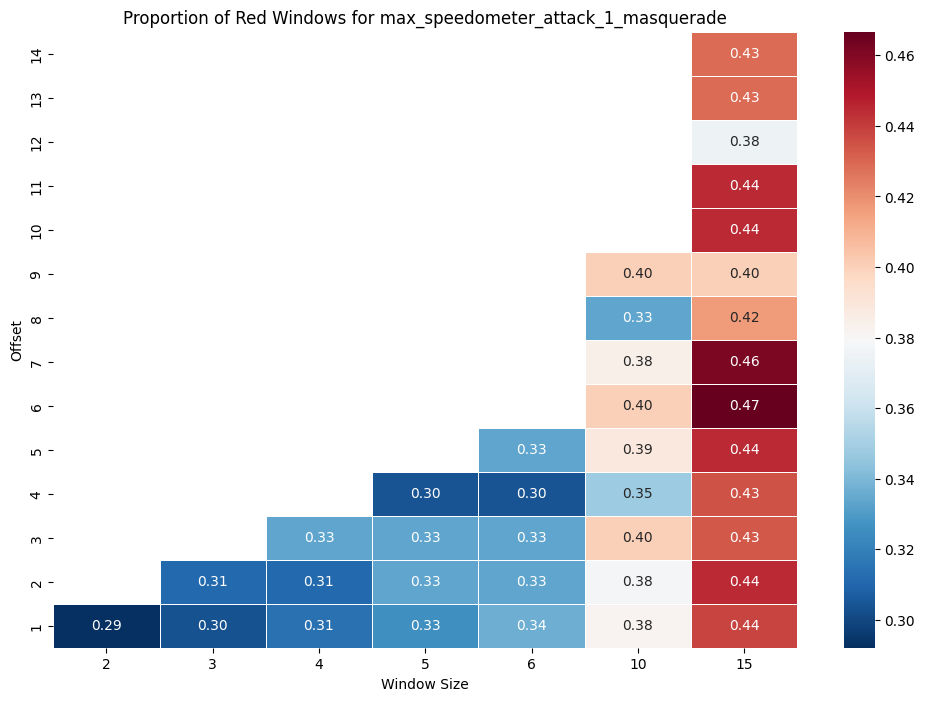

In [11]:
create_heatmap_for_attack('max_speedometer_attack_1_masquerade', all_results)


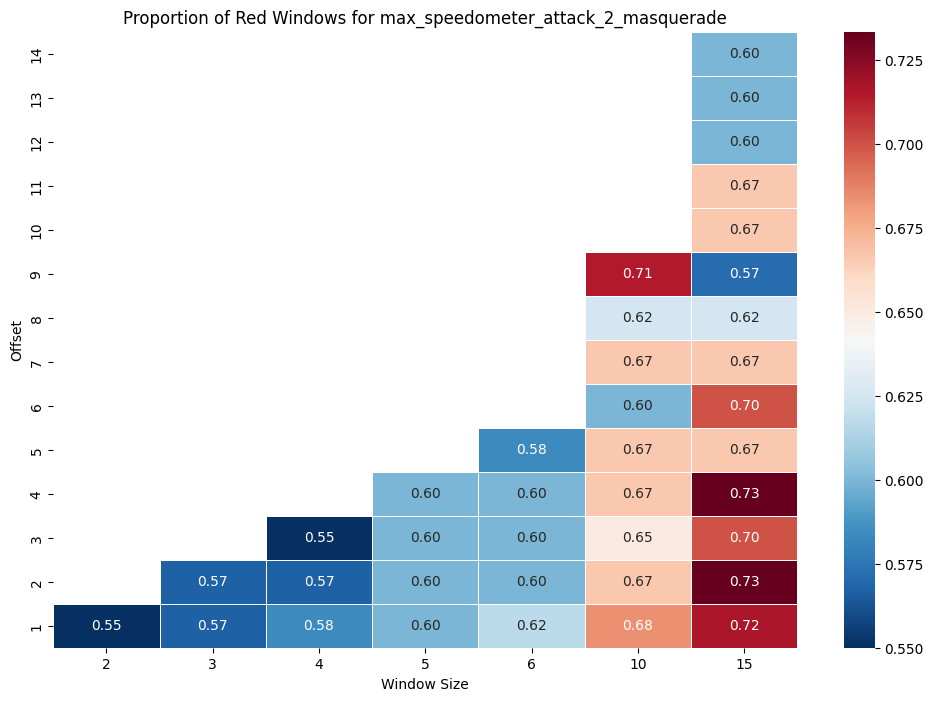

In [12]:
create_heatmap_for_attack('max_speedometer_attack_2_masquerade', all_results)


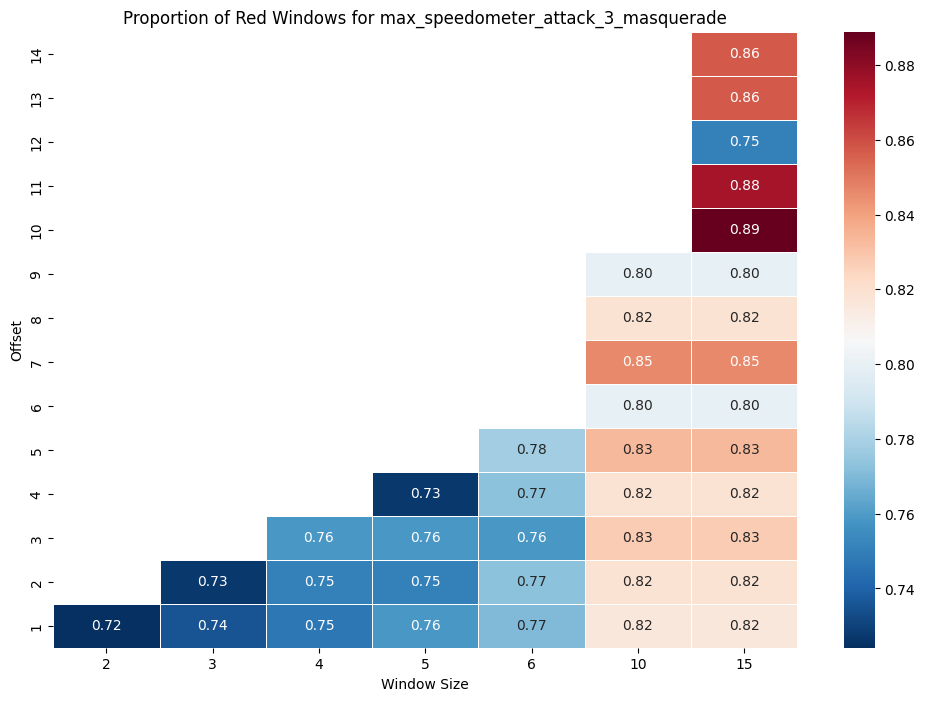

In [13]:
create_heatmap_for_attack('max_speedometer_attack_3_masquerade', all_results)


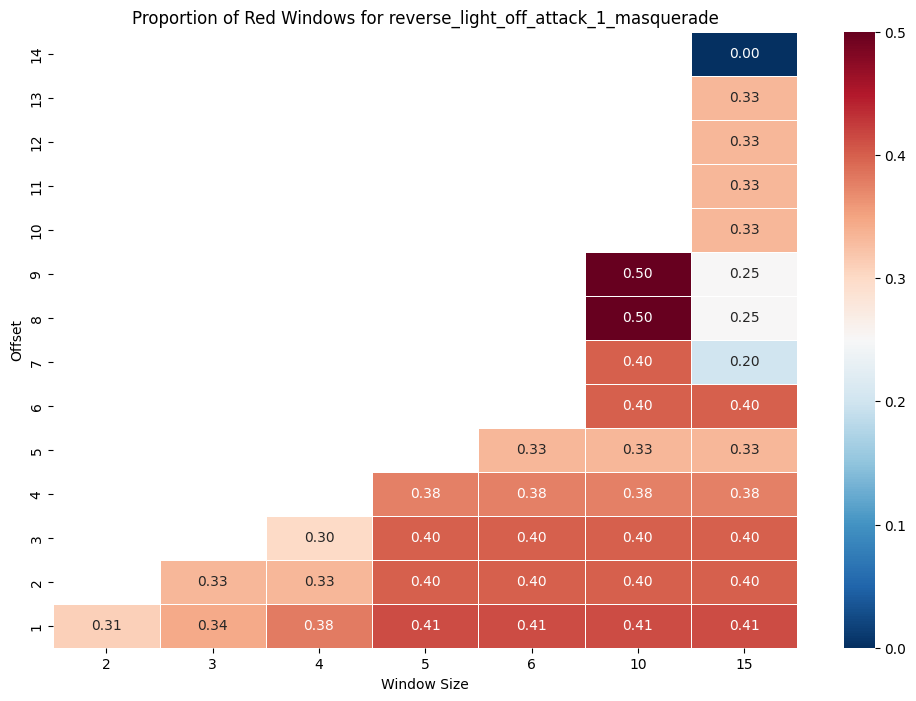

In [14]:
create_heatmap_for_attack('reverse_light_off_attack_1_masquerade', all_results)


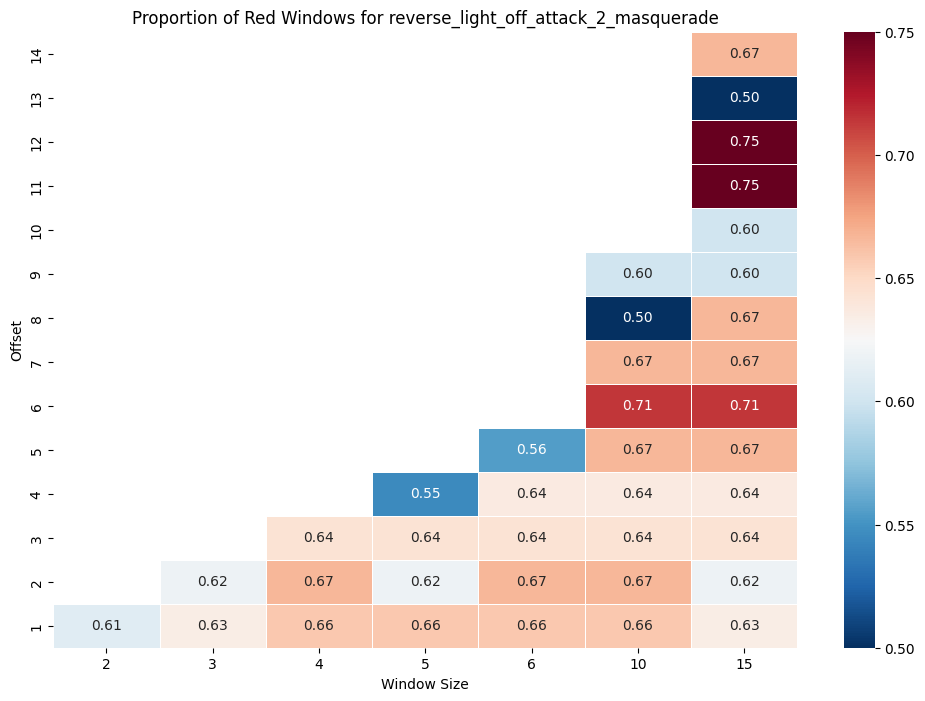

In [15]:
create_heatmap_for_attack('reverse_light_off_attack_2_masquerade', all_results)


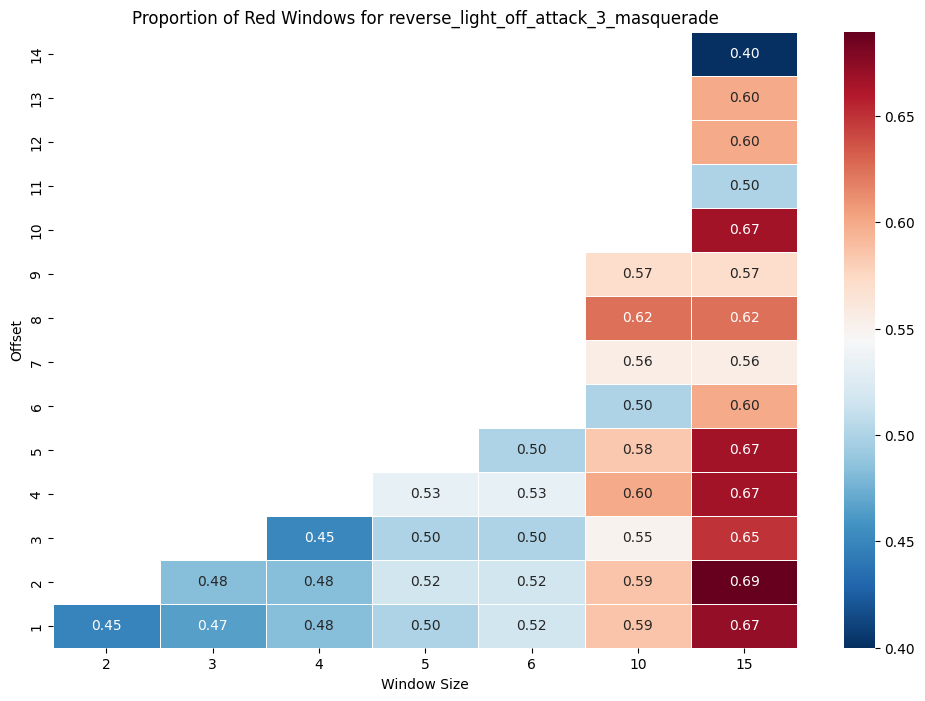

In [16]:
create_heatmap_for_attack('reverse_light_off_attack_3_masquerade', all_results)


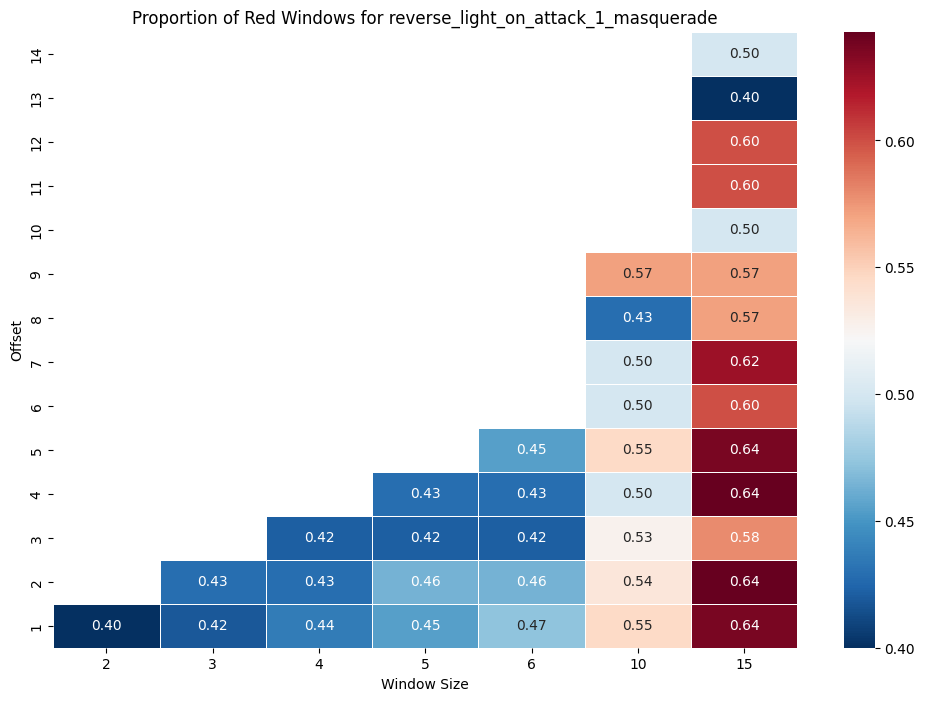

In [17]:
create_heatmap_for_attack('reverse_light_on_attack_1_masquerade', all_results)


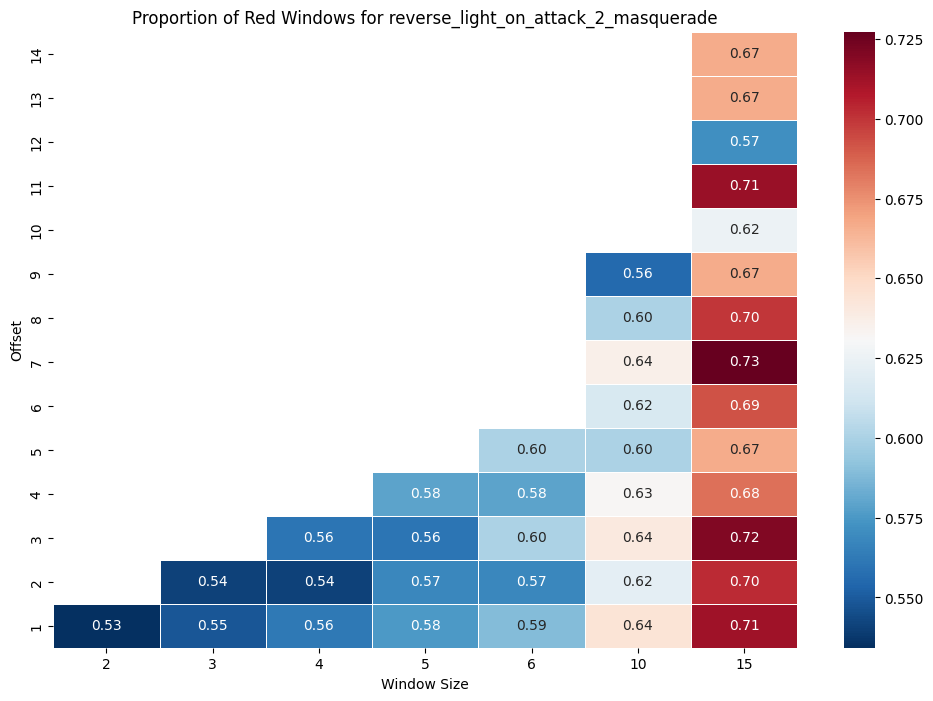

In [18]:
create_heatmap_for_attack('reverse_light_on_attack_2_masquerade', all_results)


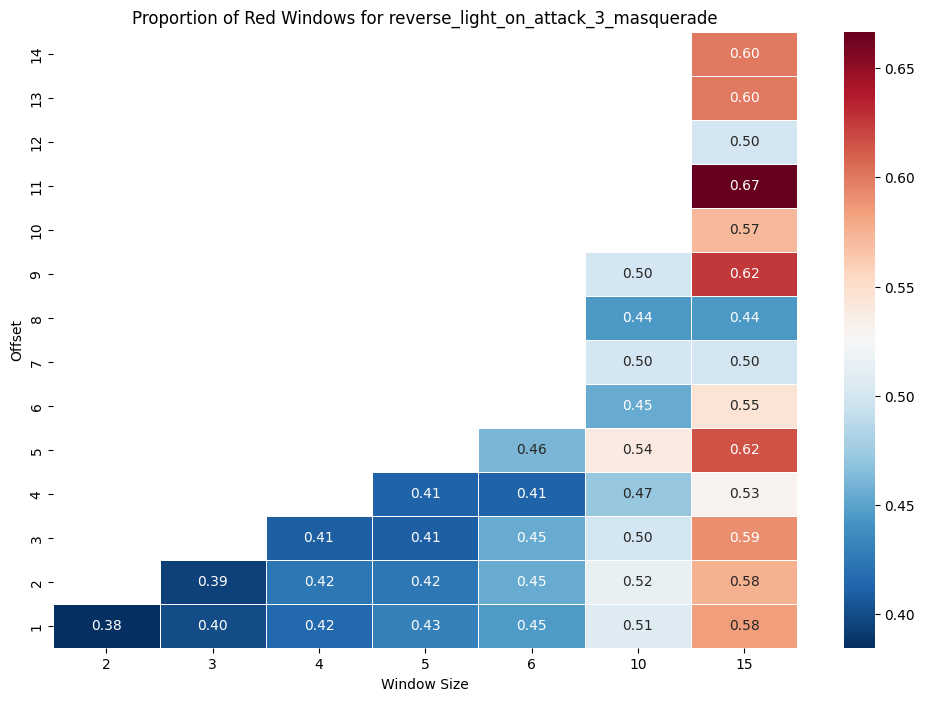

In [19]:
create_heatmap_for_attack('reverse_light_on_attack_3_masquerade', all_results)


In [20]:
def aggregate_proportions(all_results):
    # Initialize a dictionary to hold combined results
    combined_results = {}
    
    # Aggregate results
    for attack_name, results in all_results.items():
        for result in results:
            key = (result['Window Size'], result['Offset'])
            if key not in combined_results:
                combined_results[key] = []
            combined_results[key].append(result['Proportion of Red Windows'])
    
    # Calculate average proportions
    avg_results = [{'Window Size': ws, 'Offset': offset, 'Average Proportion of Red Windows': sum(proportions)/len(proportions)} 
                   for (ws, offset), proportions in combined_results.items()]
    
    return avg_results

# Aggregate proportions across all attacks
avg_results = aggregate_proportions(all_results)


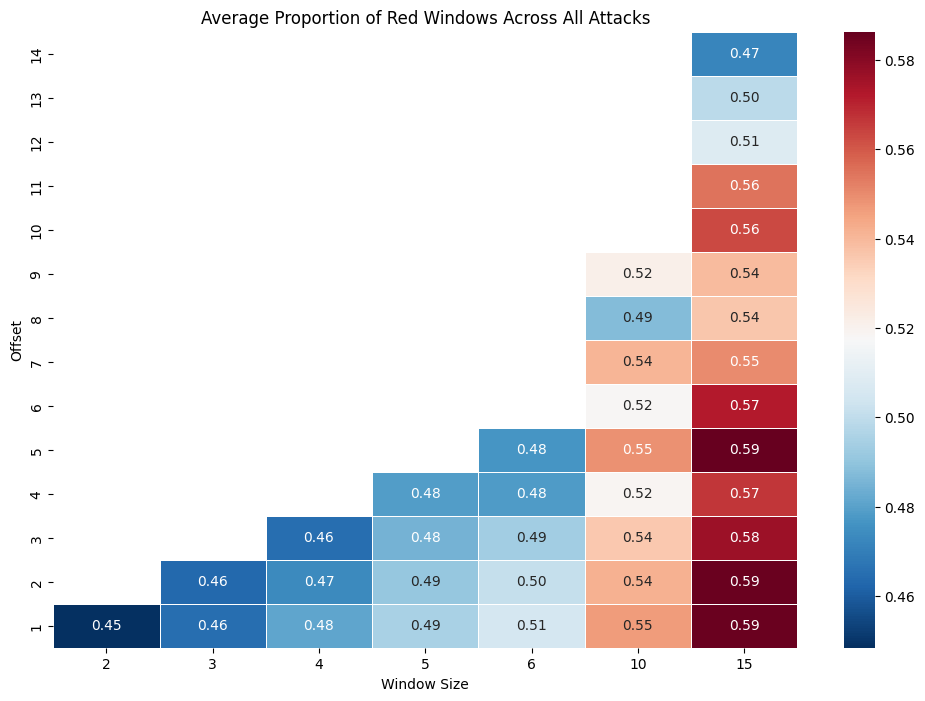

In [21]:
def create_combined_heatmap(avg_results):
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(avg_results)
    
    # Ensure offsets are in ascending order
    df.sort_values(by=['Offset', 'Window Size'], ascending=[True, True], inplace=True)
    
    # Pivot the DataFrame to create a 2D matrix for the heatmap
    heatmap_data = df.pivot(index='Offset', columns='Window Size', values='Average Proportion of Red Windows')
    
    # Plotting
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(heatmap_data, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
    plt.title('Average Proportion of Red Windows Across All Attacks')
    plt.xlabel('Window Size')
    plt.ylabel('Offset')
    
    # Invert y-axis to display offsets from 1 to 6
    ax.invert_yaxis()
    
    # Display the plot
    plt.show()

# Create the combined heatmap
create_combined_heatmap(avg_results)


In [1]:
1


1